# Feature selection for ML models

In [30]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
#import data
df = pd.read_csv('NCAA_data.csv')

In [32]:
# define y
y = df["class"]

In [17]:
# LabelEncode y 
from sklearn.preprocessing import LabelEncoder
y = df["class"]
labels = LabelEncoder()
labels.fit(y)
encoded_y = labels.transform(y)

In [18]:
# add column for encoded y values
en_y = encoded_y
df["code"]=en_y

In [21]:
# test set 1
corr_1 = df.drop(['class',"player_id","name","college", 'field_goal_percentage', 'free_throw_attempt_rate', 'free_throw_percentage', 'games_played',
                       'minutes_played','win_shares_per_40_minutes', 'points_per_40','steals_per_40',
                       'total_rebounds_per_40','turnovers_per_40'], axis=1)


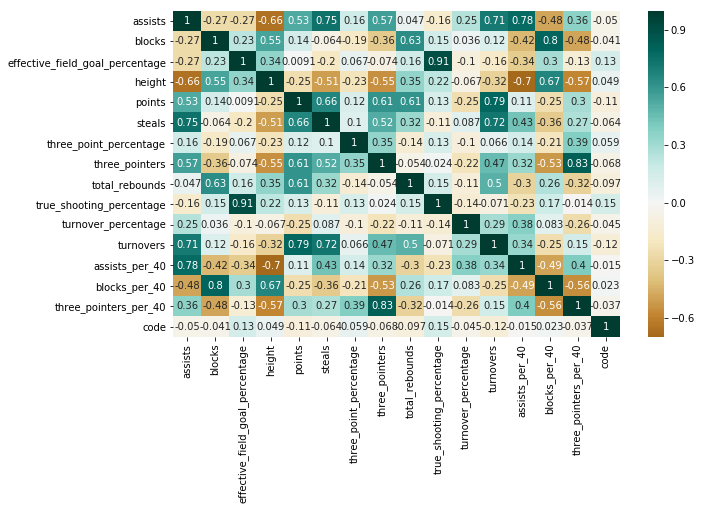

In [22]:
# create heatmap to compare features to the class to determine feature importance
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_1.corr(), center=0, cmap="BrBG", annot=True)

In [25]:
# test set #2
corr_2 = df.drop(["class","player_id","name","college",'true_shooting_percentage','assists_per_40',
            'turnovers','points','blocks_per_40','effective_field_goal_percentage','turnover_percentage',
            'blocks','three_point_percentage','steals','assists','three_pointers_per_40','three_pointers',
            'height','total_rebounds'], axis=1)

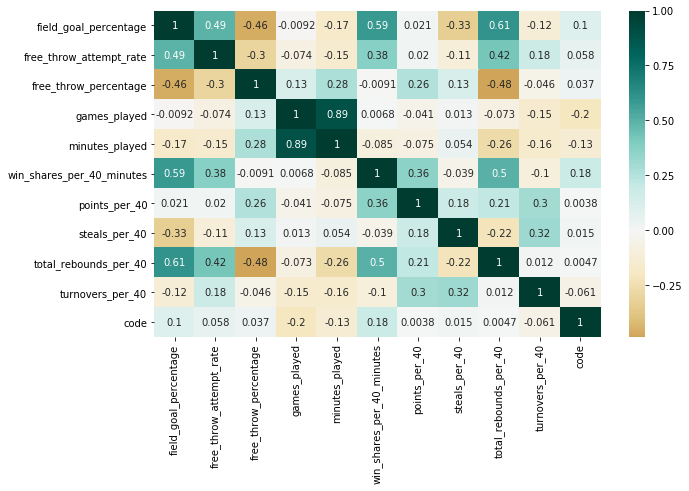

In [26]:
# create heatmap to compare features to the class to determine feature importance
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_2.corr(), center=0, cmap="BrBG", annot=True)

In [28]:
# most important features
features = df.drop(["class","player_id","name","college",'assists_per_40',
            'turnovers','points','blocks_per_40','turnover_percentage',
            'blocks','steals','assists','three_pointers_per_40','three_pointers',
            'total_rebounds', 'free_throw_percentage', 
             'games_played','minutes_played', 'points_per_40','steals_per_40',
            'total_rebounds_per_40','turnovers_per_40'], axis=1)

In [33]:
list(features.columns) 

['effective_field_goal_percentage',
 'field_goal_percentage',
 'free_throw_attempt_rate',
 'height',
 'three_point_percentage',
 'true_shooting_percentage',
 'win_shares_per_40_minutes',
 'code']

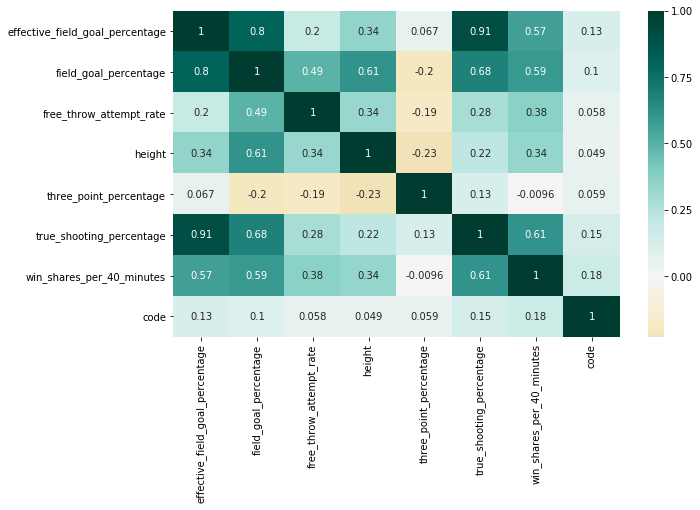

In [29]:
# compare most important features eliminate any that have a high correlation
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(features.corr(), center=0, cmap="BrBG", annot=True)

# Feature comparison for linear regression model

In [35]:
# Read the csv file into a pandas DataFrame

combined_df = pd.read_csv('combined_data.csv')
combined_df.head()

,win shares,mins played (per game),player,games,year,rank,points(per game),ws/48,box +/-,value overall replacement player,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,48.0,30.6,Kenyon Martin,757,2000,1,12.3,0.100,0.7,15.5,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,0.3,15.6,A.J. Guyton,80,2000,32,5.5,0.010,-5.4,-1.1,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,11.6,14.3,Jake Voskuhl,450,2000,33,4.0,0.087,-2.2,-0.3,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,0.6,18.7,Khalid El-Amin,50,2000,34,6.3,0.030,-3.8,-0.4,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,-0.1,10.6,Mike Smith,17,2000,35,3.0,-0.033,-5.5,-0.2,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [36]:
points_total = combined_df.drop(['win shares','mins played (per game)','player','games','year',
 'rank','points(per game)','ws/48','box +/-','value overall replacement player',
 'team','college','years','mins played (total)','class',
 'player_id','college_id','word','name','assists','blocks','effective_field_goal_percentage',
 'free_throw_percentage','games_played','minutes_played','points','steals',
 'three_pointers','total_rebounds','turnover_percentage','turnovers','assists_per_40',
 'blocks_per_40','points_per_40','steals_per_40','three_pointers_per_40','total_rebounds_per_40',
 'turnovers_per_40'], axis = 1)
                     
points_total.head()

,points (total),field_goal_percentage,free_throw_attempt_rate,height,three_point_percentage,true_shooting_percentage,win_shares_per_40_minutes
0,9325,0.586,0.494,81,0.222000,0.592,0.346
1,442,0.455,0.249,73,0.414000,0.572,0.145
2,1814,0.542,0.555,83,0.329162,0.573,0.237
3,314,0.416,0.257,70,0.355000,0.527,0.158
4,51,0.428,0.357,80,0.318000,0.551,0.165


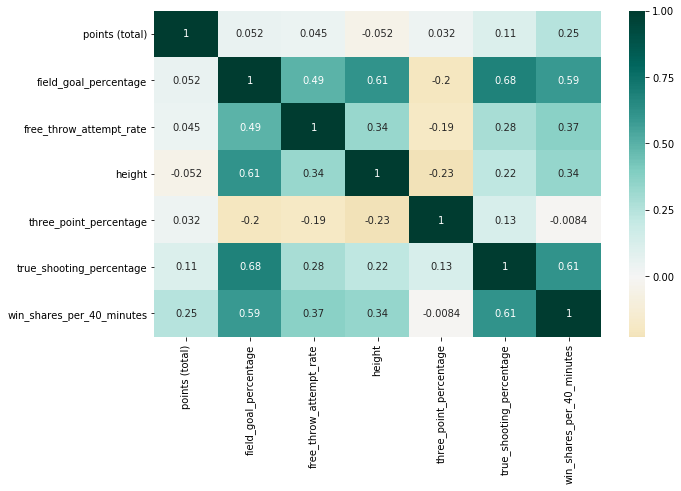

In [37]:
# compare most important features to total points
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(points_total.corr(), center=0, cmap="BrBG", annot=True)

In [41]:
points_per_game = combined_df.drop(['win shares','mins played (per game)','player','games','year',
 'rank','ws/48','box +/-','value overall replacement player',
 'team','college','years','mins played (total)','points (total)','class',
 'player_id','college_id','word','name','assists','blocks','effective_field_goal_percentage',
 'free_throw_percentage','games_played','minutes_played','points','steals',
 'three_pointers','total_rebounds','turnover_percentage','turnovers','assists_per_40',
 'blocks_per_40','points_per_40','steals_per_40','three_pointers_per_40','total_rebounds_per_40',
 'turnovers_per_40'], axis = 1)
                     
points_per_game.head()

,points(per game),field_goal_percentage,free_throw_attempt_rate,height,three_point_percentage,true_shooting_percentage,win_shares_per_40_minutes
0,12.3,0.586,0.494,81,0.222000,0.592,0.346
1,5.5,0.455,0.249,73,0.414000,0.572,0.145
2,4.0,0.542,0.555,83,0.329162,0.573,0.237
3,6.3,0.416,0.257,70,0.355000,0.527,0.158
4,3.0,0.428,0.357,80,0.318000,0.551,0.165


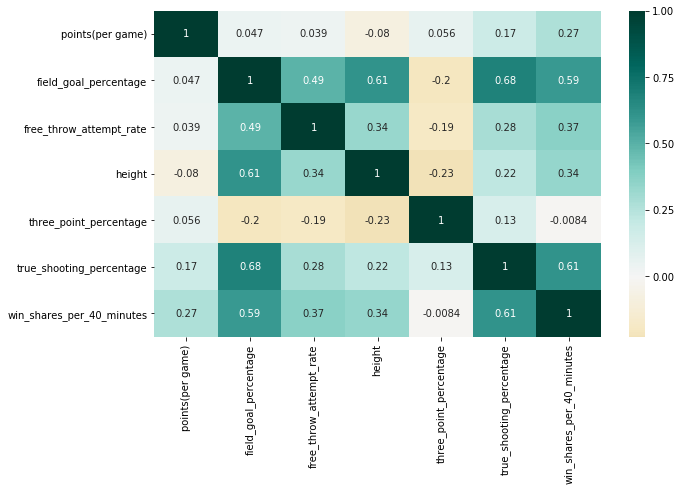

In [42]:
# compare most important features to points per game
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(points_per_game.corr(), center=0, cmap="BrBG", annot=True)

In [39]:
ws_48 = combined_df.drop(['win shares','mins played (per game)','player','games','year',
 'rank','points(per game)','box +/-','value overall replacement player',
 'team','college','years','mins played (total)','points (total)','class',
 'player_id','college_id','word','name','assists','blocks','effective_field_goal_percentage',
 'free_throw_percentage','games_played','minutes_played','points','steals',
 'three_pointers','total_rebounds','turnover_percentage','turnovers','assists_per_40',
 'blocks_per_40','points_per_40','steals_per_40','three_pointers_per_40','total_rebounds_per_40',
 'turnovers_per_40'], axis = 1)
                     
ws_48.head()

,ws/48,field_goal_percentage,free_throw_attempt_rate,height,three_point_percentage,true_shooting_percentage,win_shares_per_40_minutes
0,0.100,0.586,0.494,81,0.222000,0.592,0.346
1,0.010,0.455,0.249,73,0.414000,0.572,0.145
2,0.087,0.542,0.555,83,0.329162,0.573,0.237
3,0.030,0.416,0.257,70,0.355000,0.527,0.158
4,-0.033,0.428,0.357,80,0.318000,0.551,0.165


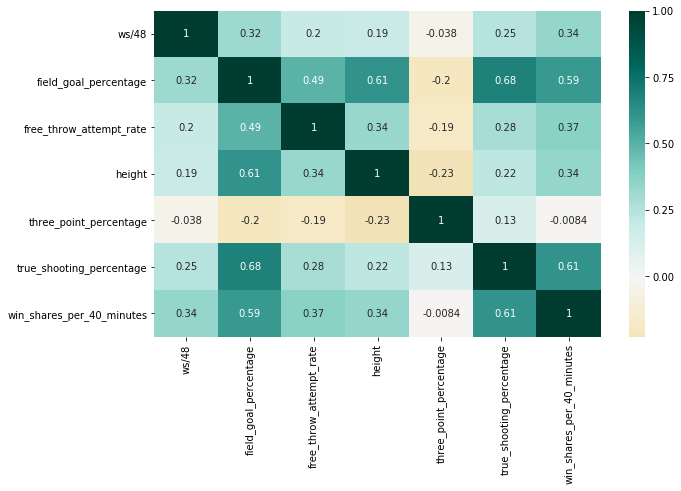

In [43]:
# compare most important features to total points
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(ws_48.corr(), center=0, cmap="BrBG", annot=True)